In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats 
warnings.filterwarnings('ignore')

In [3]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,TotalSalesRupees,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.93027,12.85,9.033644
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.93027,12.85,9.033644
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.93027,12.85,9.033644
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.93027,12.85,9.033644
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.93027,12.85,9.033644


## Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [4]:
# summary statistics
df.describe()

,VendorNumber,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,TotalSalesRupees,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,1002.673282,113.543504,145.676975,541.819942,60.300097,6987.037536,1275.909971,188448.060044,3083.670073,18844.807517,14680.849864,181461.022507,96.222179,28.268217,63.573759
std,1.388375,60.652749,78.207529,373.950028,24.719383,4866.217517,168.033836,20583.969292,444.990945,2058.398709,1451.251223,21536.950646,2.706910,21.195898,90.172913
min,1001.000000,12.500000,16.660000,100.000000,10.000000,362.400000,840.000000,154557.900000,2298.460000,15455.790000,11591.720000,133322.900000,86.260812,8.400000,7.278451
25%,1002.000000,58.550000,74.650000,200.000000,40.000000,2895.000000,1200.000000,170022.700000,2691.860000,17002.270000,13601.850000,163910.900000,94.542141,15.937500,18.322201
50%,1002.000000,114.600000,143.250000,500.000000,60.000000,5812.200000,1285.000000,198505.300000,3119.250000,19850.530000,15880.400000,186510.100000,96.664573,21.250000,29.981166
75%,1004.000000,154.712500,206.082500,1000.000000,80.000000,10696.800000,1450.000000,212650.150000,3667.670000,21265.020000,15948.770000,201122.150000,98.385247,30.000000,61.928981
max,1005.000000,237.430000,298.700000,1000.000000,100.000000,21974.000000,1450.000000,212650.150000,3667.670000,21265.020000,15948.770000,212152.000000,99.817436,128.500000,547.751932


In [5]:
# summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,2066.0,1002.673282,1.388375,1001.000000,1002.000000,1002.000000,1004.000000,1005.000000
PurchasePrice,2066.0,113.543504,60.652749,12.500000,58.550000,114.600000,154.712500,237.430000
ActualPrice,2066.0,145.676975,78.207529,16.660000,74.650000,143.250000,206.082500,298.700000
Volume,2066.0,541.819942,373.950028,100.000000,200.000000,500.000000,1000.000000,1000.000000
TotalPurchaseQuantity,2066.0,60.300097,24.719383,10.000000,40.000000,60.000000,80.000000,100.000000
TotalPurchaseRupees,2066.0,6987.037536,4866.217517,362.400000,2895.000000,5812.200000,10696.800000,21974.000000
TotalSalesQuantity,2066.0,1275.909971,168.033836,840.000000,1200.000000,1285.000000,1450.000000,1450.000000
TotalSalesRupees,2066.0,188448.060044,20583.969292,154557.900000,170022.700000,198505.300000,212650.150000,212650.150000
TotalSalesPrice,2066.0,3083.670073,444.990945,2298.460000,2691.860000,3119.250000,3667.670000,3667.670000
TotalExciseTax,2066.0,18844.807517,2058.398709,15455.790000,17002.270000,19850.530000,21265.020000,21265.020000


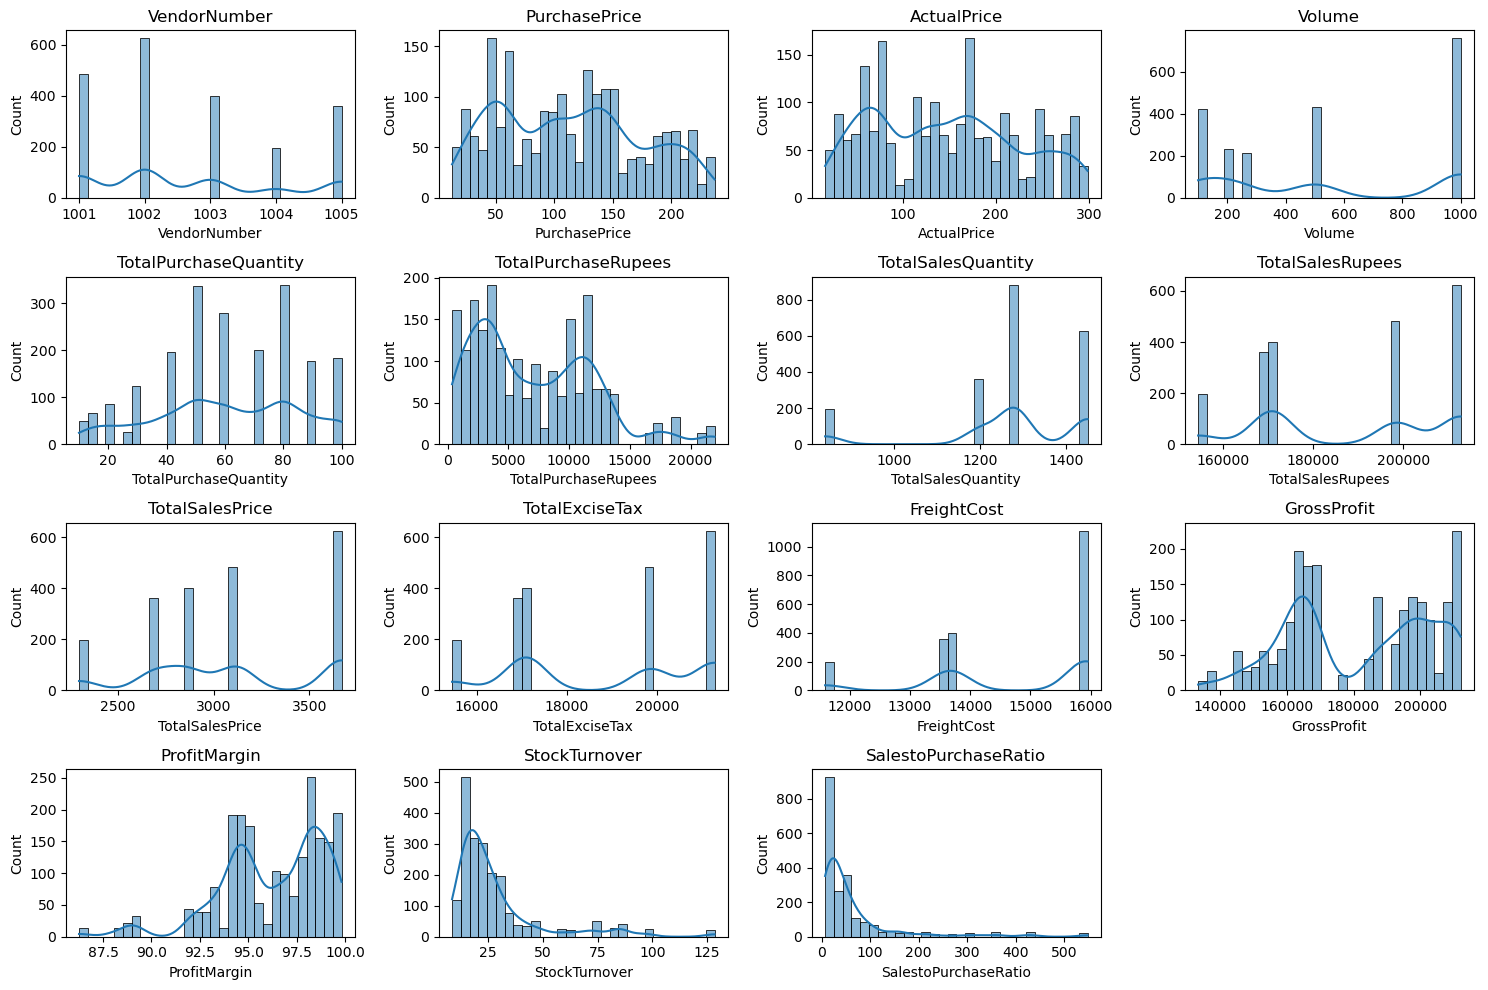

In [6]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)   # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.savefig('distribution_plots.png', dpi=300, bbox_inches='tight')
plt.show()

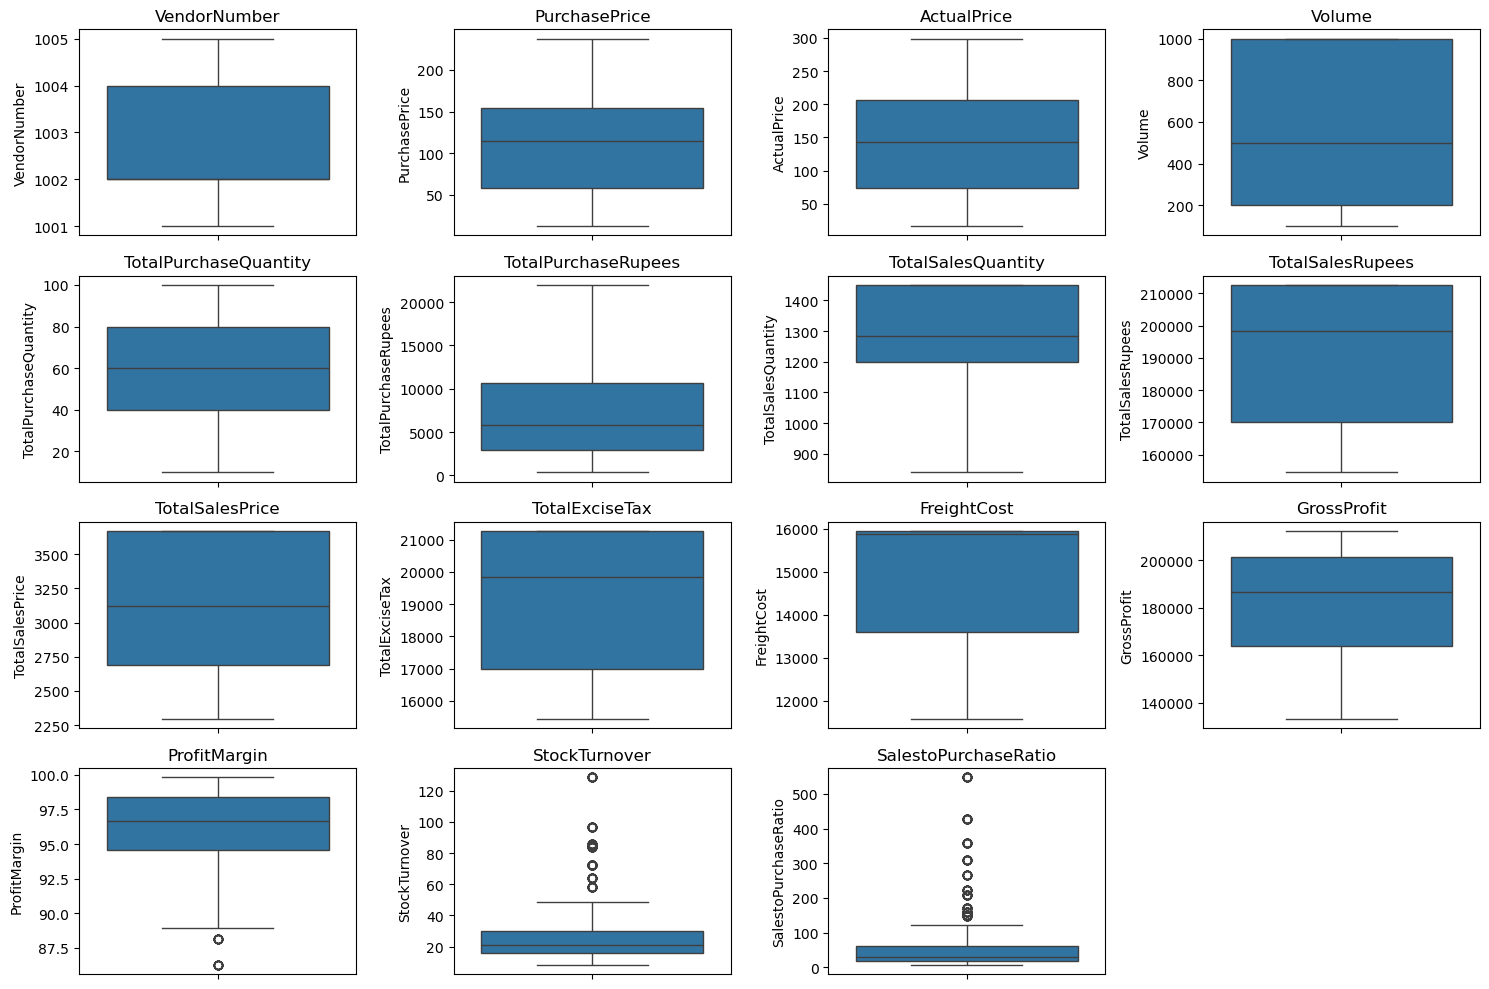

In [9]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('boxplot_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

###  Summary Statistics Insights:

####  Negative & Zero Values:

- **Gross Profit**: Minimum value is `133,322.90`, indicating no losses in the current dataset. This suggests all products are generating positive profit.
- **Profit Margin**: Minimum is `86.26%`, indicating even the lowest-margin products are profitable. This reflects efficient pricing and cost control.
- **Total Sales Quantity & Total Sales Rupees**: Minimum values are `86.26` and `154,557.90`, respectively. This shows that every product listed has been sold at least once, with no zero-sales entries.

---

####  Outliers Indicated by High Standard Deviations:

- **Purchase & Actual Prices**: Range from `16.66` to `298.70`. The wide spread indicates a mix of both budget and premium-priced products.
- **Freight Cost**: The average freight cost is `14,680.85`, suggesting moderate logistics expenses; spikes above this may indicate inefficiencies or large bulk shipments.
- **Stock Turnover**: Goes up to `128.5`, suggesting some products are selling extremely quickly or are fulfilled from old stock. Values this high indicate potential over-performance or inventory cycling issues.
- **Sales to Purchase Ratio**: Mean is `63.57`, meaning on average, sales value is 63.57 times the purchase value. Exceptionally high ratios may reflect pricing strategy or legacy stock sales.



In [25]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [26]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,TotalSalesRupees,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,214.20,250,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932
2062,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,237.10,100,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932
2063,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,256.32,100,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932
2064,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,274.68,1000,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932


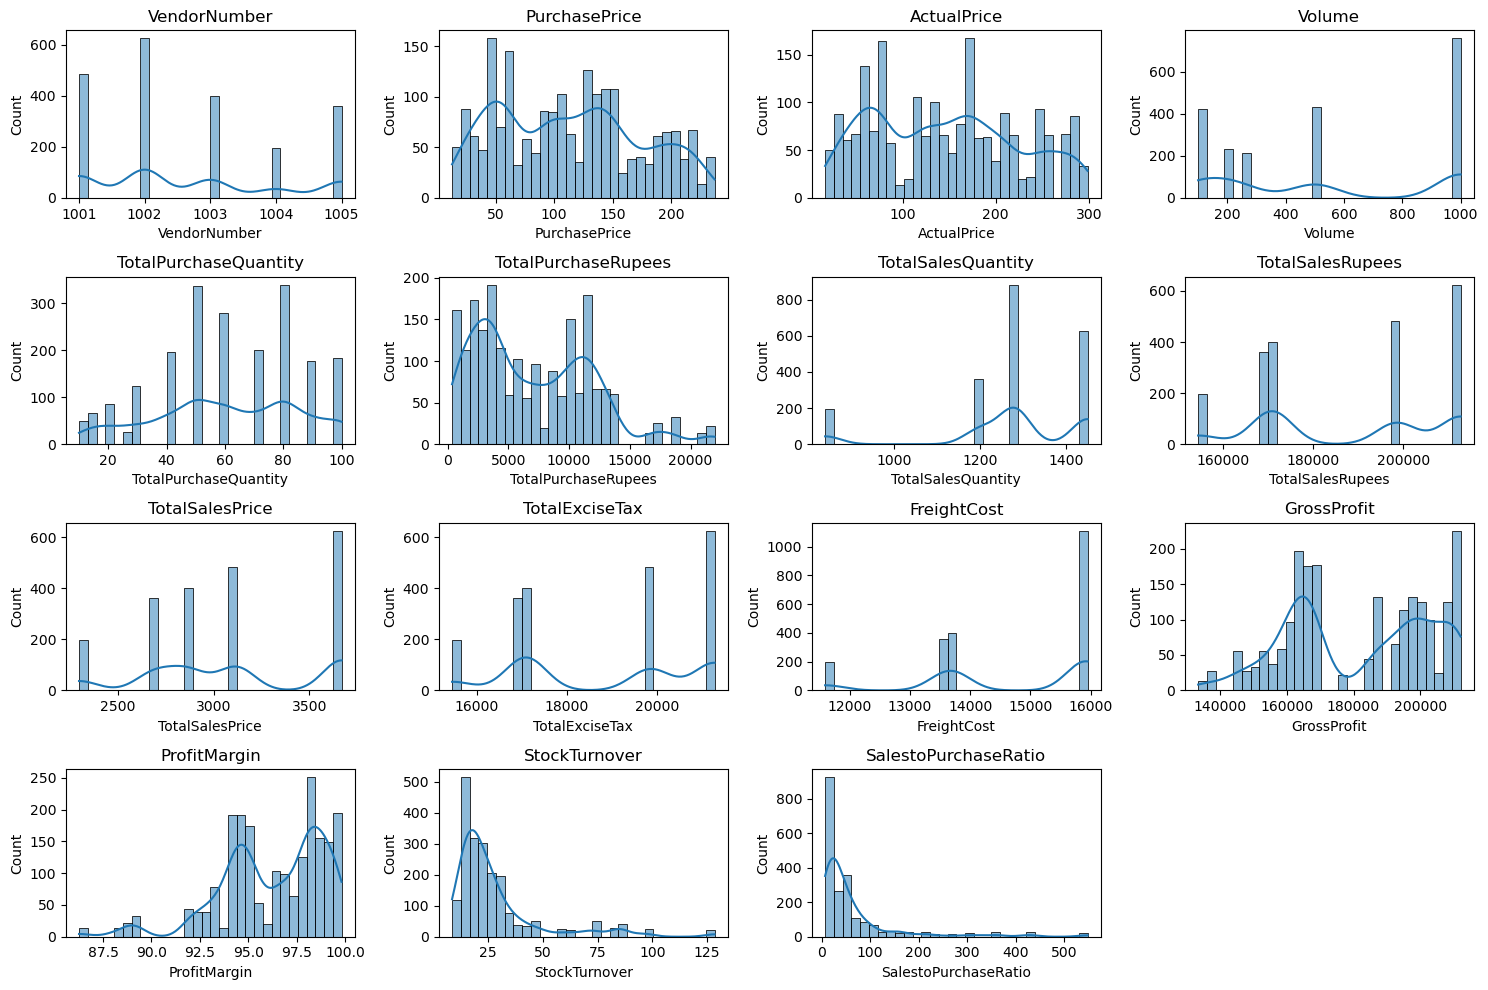

In [27]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)   # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

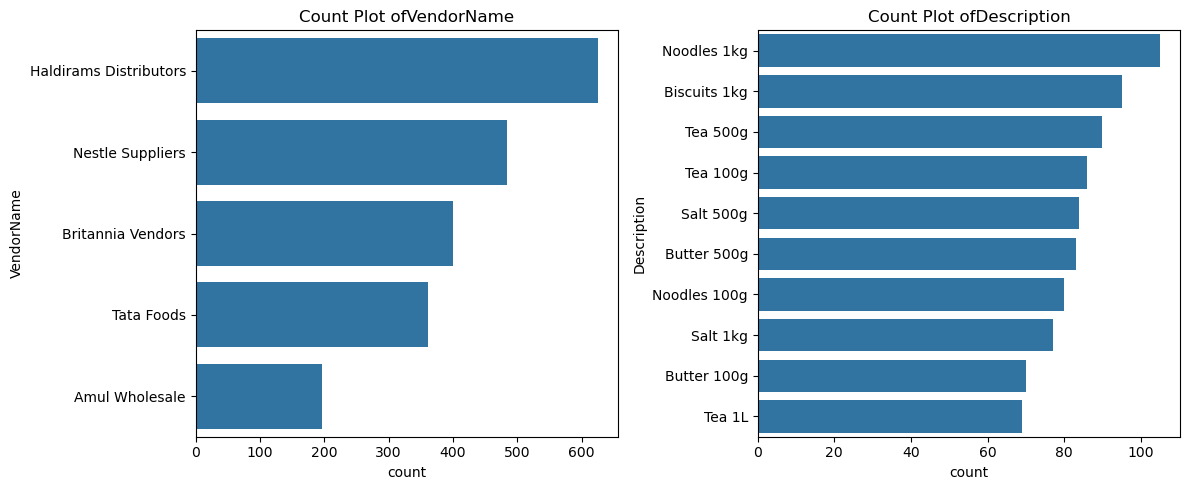

In [28]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])   # Top 10 categories
    plt.title(f"Count Plot of{col}")
plt.tight_layout()
plt.show()

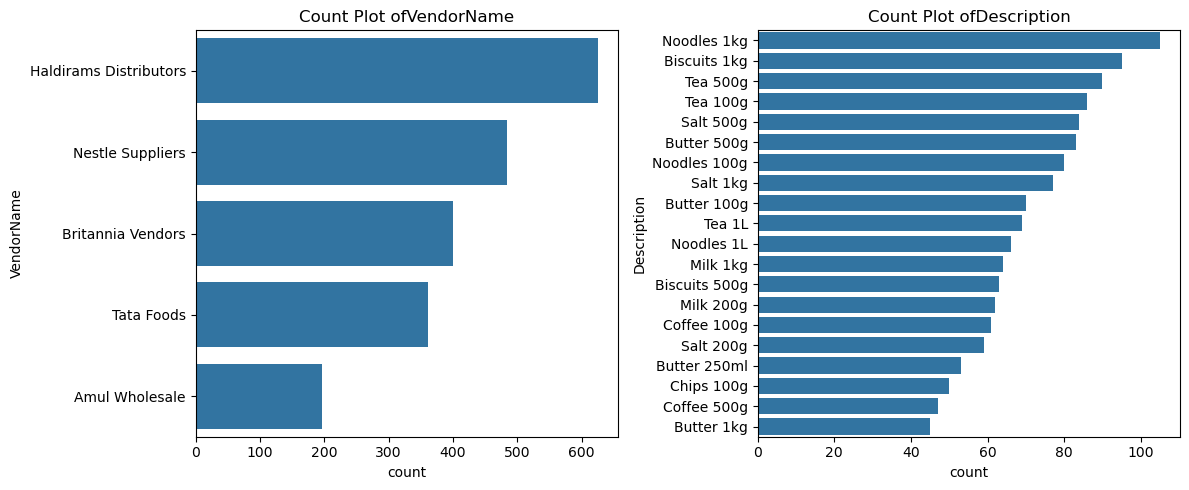

In [10]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:20])   # Top 20 categories
    plt.title(f"Count Plot of{col}")
plt.tight_layout()
plt.savefig('categorical_count_plots.png', dpi=300, bbox_inches='tight')
plt.show()

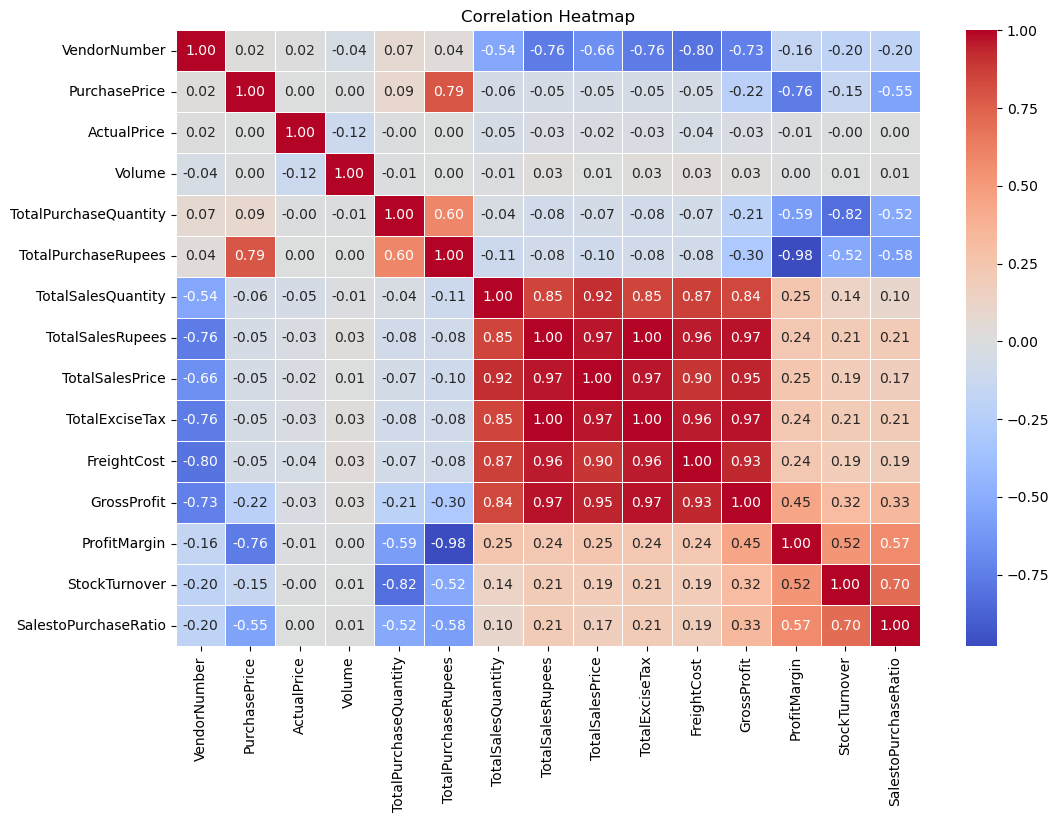

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


###  Correlation Insights

- **PurchasePrice** shows weak or no correlation with `TotalSalesRupees` (-0.05) and `GrossProfit` (-0.22), indicating that purchase prices have limited influence on sales revenue or profitability.

- **TotalPurchaseQuantity** is strongly correlated with `TotalSalesQuantity` (0.85), validating the expected link between purchasing and sales volume.

- **TotalSalesRupees**, `TotalSalesPrice`, and `TotalExciseTax` are highly interrelated (all correlations > 0.96), suggesting consistent pricing and tax relationships across sales.

- **FreightCost** has a strong positive correlation with `TotalSalesRupees` (0.96), implying that vendors selling more are likely incurring higher freight charges.

- **GrossProfit** is highly correlated with `TotalSalesRupees` (0.97) and `TotalSalesQuantity` (0.84), which is expected since profit is directly tied to sales.

- **ProfitMargin** has a moderate positive correlation with `GrossProfit` (0.45) but a weak correlation with `TotalSalesRupees` (0.24), indicating margin is not just a function of revenue size.

- **StockTurnover** has weak correlations with `GrossProfit` (0.32) and `ProfitMargin` (0.52), meaning high turnover doesn’t necessarily equate to higher profitability or margin.

- **SalesToPurchaseRatio** is moderately correlated with both `ProfitMargin` (0.57) and `StockTurnover` (0.70), showing it's a useful metric for evaluating performance efficiency.


### Data Analysis

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.


In [16]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesRupees':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [17]:
brand_performance

,Description,TotalSalesRupees,ProfitMargin
0,Biscuits 100g,5316253.75,94.910185
1,Biscuits 1L,4367116.60,94.220003
2,Biscuits 1kg,16629282.50,94.555553
3,Biscuits 500g,11777116.35,95.129223
4,Butter 100g,14066469.50,97.402378
5,Butter 1L,2163810.60,95.651533
6,Butter 1kg,8750215.75,96.887838
7,Butter 200g,3433962.00,98.608721
8,Butter 250ml,8828203.90,95.315516
9,Butter 500g,16214297.55,97.896568


In [18]:
low_sales_threshold = brand_performance['TotalSalesRupees'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [19]:
low_sales_threshold

np.float64(3713908.38)

In [20]:
high_margin_threshold

np.float64(98.14182365895813)

In [21]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesRupees'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesRupees'))


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesRupees,ProfitMargin
41,Tea 250ml,2163810.6,98.175053
7,Butter 200g,3433962.0,98.608721


In [22]:
brand_performance = brand_performance[brand_performance['TotalSalesRupees']<10000000] # for better visualisation

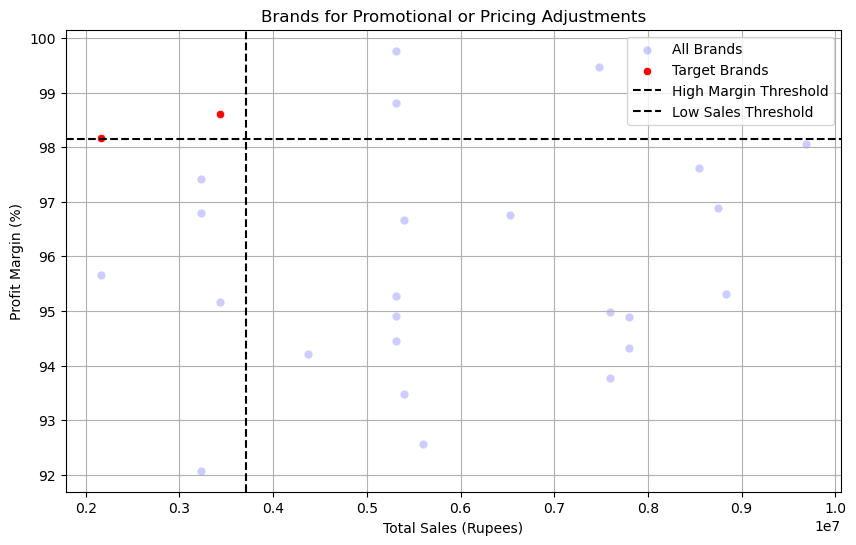

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesRupees', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesRupees', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales (Rupees)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.savefig('brand_adjustments_plot.png', dpi=300, bbox_inches='tight')
plt.show()


Which vendors and brand demonstrates the highest sales performance?


In [25]:
def format_rupees(value):
    if value >= 10_000_000:
        return f"{value / 10_000_000:.2f} Cr"
    elif value >= 100_000:
        return f"{value / 100_000:.2f} L"
    else:
        return str(value)


In [26]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesRupees"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesRupees"].sum().nlargest(10)
top_vendors


VendorName
Haldirams Distributors    1.329063e+08
Nestle Suppliers          9.607657e+07
Britannia Vendors         6.867924e+07
Tata Foods                6.137819e+07
Amul Wholesale            3.029335e+07
Name: TotalSalesRupees, dtype: float64

In [27]:
top_vendors

VendorName
Haldirams Distributors    1.329063e+08
Nestle Suppliers          9.607657e+07
Britannia Vendors         6.867924e+07
Tata Foods                6.137819e+07
Amul Wholesale            3.029335e+07
Name: TotalSalesRupees, dtype: float64

In [28]:
top_brands

Description
Noodles 1kg     19578194.95
Tea 500g        17500431.50
Biscuits 1kg    16629282.50
Tea 100g        16347763.65
Butter 500g     16214297.55
Salt 500g       15602157.20
Noodles 100g    15265160.40
Butter 100g     14066469.50
Salt 1kg        13940926.95
Tea 1L          13862938.80
Name: TotalSalesRupees, dtype: float64

In [29]:
top_brands.apply(lambda x : format_rupees(x))

Description
Noodles 1kg     1.96 Cr
Tea 500g        1.75 Cr
Biscuits 1kg    1.66 Cr
Tea 100g        1.63 Cr
Butter 500g     1.62 Cr
Salt 500g       1.56 Cr
Noodles 100g    1.53 Cr
Butter 100g     1.41 Cr
Salt 1kg        1.39 Cr
Tea 1L          1.39 Cr
Name: TotalSalesRupees, dtype: object

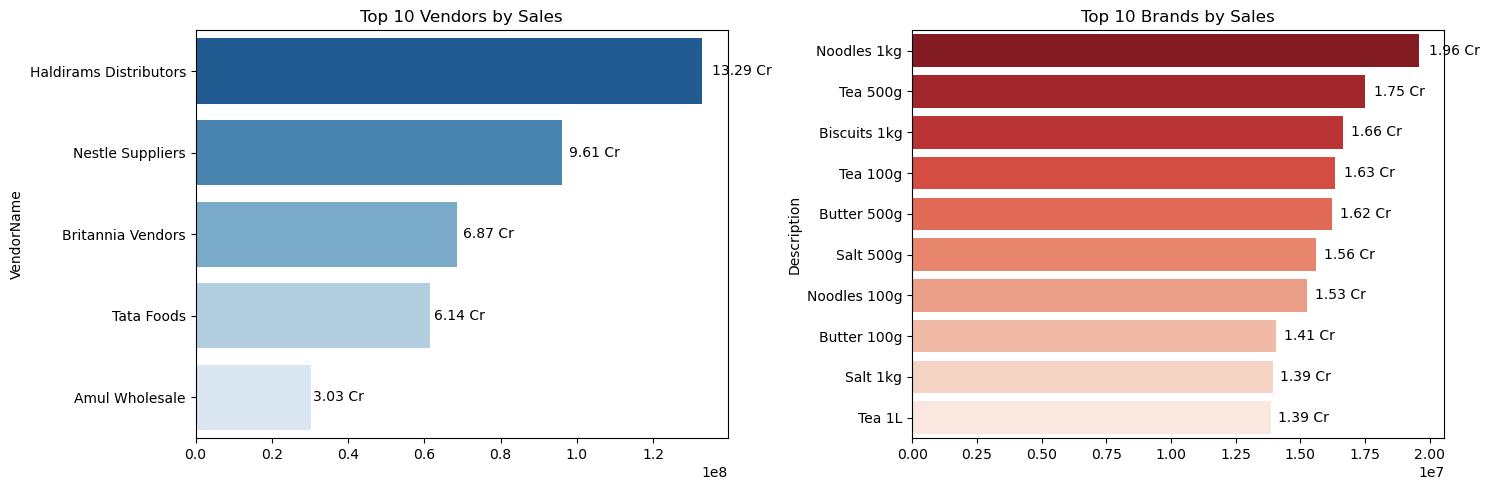

In [30]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_rupees(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_rupees(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('top_vendors_and_brands.png', dpi=300, bbox_inches='tight')
plt.show()


Which vendors contribute the most to total purchase rupees?


In [32]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseRupees':'sum',
    'GrossProfit':'sum',
    'TotalSalesRupees':'sum'
}).reset_index()

In [33]:
vendor_performance.shape

(5, 4)

In [34]:
vendor_performance

,VendorName,TotalPurchaseRupees,GrossProfit,TotalSalesRupees
0,Amul Wholesale,1622840.80,28670507.6,3.029335e+07
1,Britannia Vendors,2747148.00,65932092.0,6.867924e+07
2,Haldirams Distributors,3987191.25,128919152.5,1.329063e+08
3,Nestle Suppliers,3493688.00,92582877.2,9.607657e+07
4,Tata Foods,2584351.50,58793843.2,6.137819e+07


In [35]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseRupees']/ vendor_performance['TotalPurchaseRupees'].sum()*100

In [36]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [37]:
# Display Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesRupees'] = top_vendors['TotalSalesRupees'].apply(format_rupees)
top_vendors['TotalPurchaseRupees'] = top_vendors['TotalPurchaseRupees'].apply(format_rupees)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_rupees)
top_vendors

,VendorName,TotalPurchaseRupees,GrossProfit,TotalSalesRupees,PurchaseContribution%
2,Haldirams Distributors,39.87 L,12.89 Cr,13.29 Cr,27.62
3,Nestle Suppliers,34.94 L,9.26 Cr,9.61 Cr,24.20
1,Britannia Vendors,27.47 L,6.59 Cr,6.87 Cr,19.03
4,Tata Foods,25.84 L,5.88 Cr,6.14 Cr,17.90
0,Amul Wholesale,16.23 L,2.87 Cr,3.03 Cr,11.24


In [38]:
top_vendors['PurchaseContribution%'].sum()

np.float64(99.99)

In [39]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseRupees,GrossProfit,TotalSalesRupees,PurchaseContribution%,Cumulative_Contribution%
2,Haldirams Distributors,39.87 L,12.89 Cr,13.29 Cr,27.62,27.62
3,Nestle Suppliers,34.94 L,9.26 Cr,9.61 Cr,24.20,51.82
1,Britannia Vendors,27.47 L,6.59 Cr,6.87 Cr,19.03,70.85
4,Tata Foods,25.84 L,5.88 Cr,6.14 Cr,17.90,88.75
0,Amul Wholesale,16.23 L,2.87 Cr,3.03 Cr,11.24,99.99


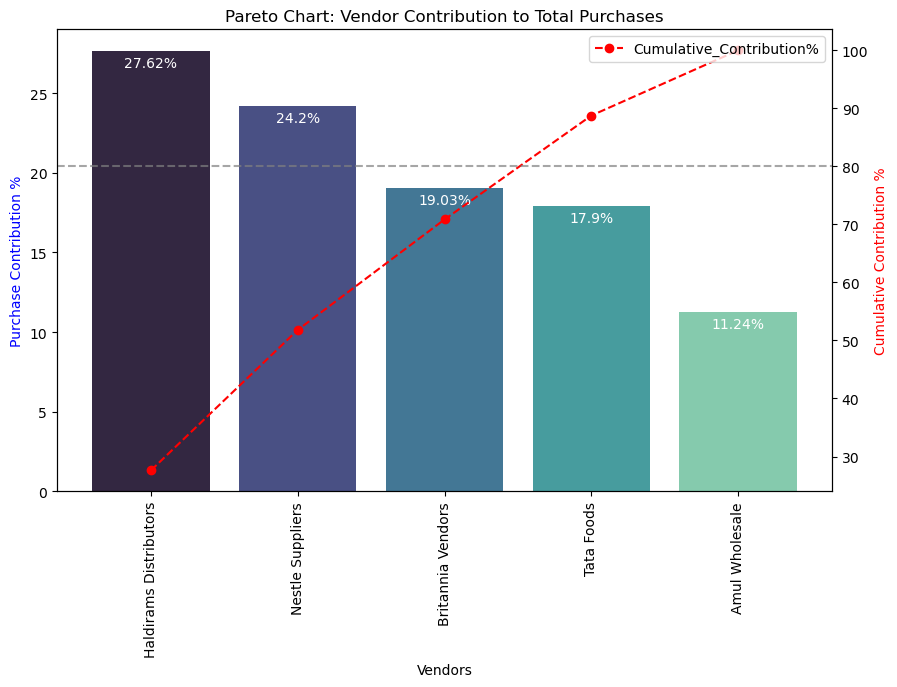

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=80, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.savefig('pareto_vendor_contribution.png', dpi=300, bbox_inches='tight')
plt.show()

How much of total procurement is dependent on the top vendors?

In [41]:
print(f"Total Purchase Contribution of top vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top vendors is 99.99 %


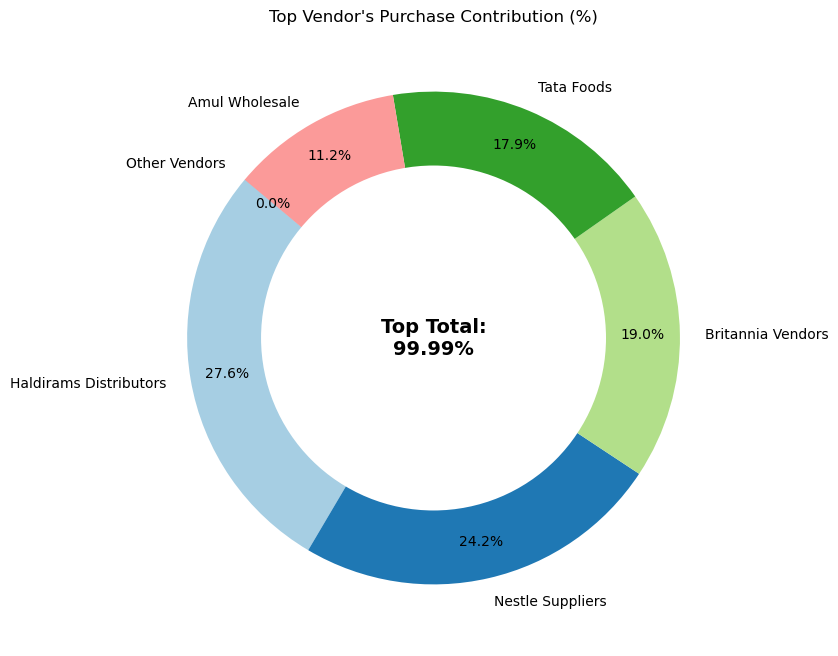

In [42]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
    startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top Vendor's Purchase Contribution (%)")
plt.savefig('vendor_donut_chart.png', dpi=300, bbox_inches='tight')
plt.show()

Does purchasing in bulk reduce the unit price and what is th optimal purchase volume for cost savings?


In [43]:
df['UnitPurchasePrice'] = df['TotalPurchaseRupees'] / df['TotalPurchaseQuantity']

In [44]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,TotalSalesRupees,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,198505.3,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,214.20,250,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16
2062,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,237.10,100,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16
2063,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,256.32,100,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16
2064,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,274.68,1000,15,362.4,1285,198505.3,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16


In [45]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=("Small", "Medium", "Large"))

In [46]:
df['OrderSize']

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
2061    Small
2062    Small
2063    Small
2064    Small
2065    Small
Name: OrderSize, Length: 2066, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [47]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,100
1,Large,100
2,Large,100
3,Large,100
4,Large,100
...,...,...
2061,Small,15
2062,Small,15
2063,Small,15
2064,Small,15


In [48]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,111.080305
Medium,116.134585
Large,113.696537


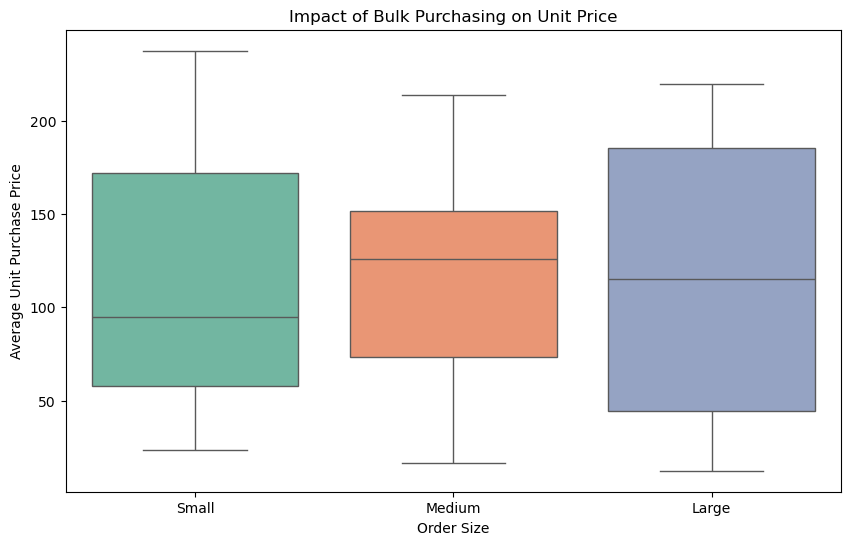

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.savefig('bulk_purchase_impact.png', dpi=300, bbox_inches='tight')
plt.show()

- **Large orders** (100 units) achieve a moderate unit price of **Rs. 113.70**, showing bulk purchasing benefits
- **Medium orders** have the highest unit price at **Rs. 116.13**, suggesting neither bulk nor small order advantages
- **Small orders** (15 units) show a competitive price of **Rs. 111.08**, potentially due to:
  - Higher base pricing for small quantities
  - Different product mix in small orders
  - Vendor-specific pricing strategies

- The price difference between order sizes is relatively small (~4.5% between Small and Large)
- This indicates that while bulk discounts exist, they may not be substantial enough to strongly incentivize larger orders
- Further analysis needed on profitability by order size to understand the full pricing strategy impact

Which vendors have low inventpry turnover, indicating excess stock and slow-moving products

In [50]:
df[df['StockTurnover']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,TotalSalesRupees,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize


In [51]:
# Check for rows where sales exceed purchases
problematic = df[df['TotalSalesQuantity'] > df['TotalPurchaseQuantity']]
print(problematic[['TotalPurchaseQuantity', 'TotalSalesQuantity']].head())

   TotalPurchaseQuantity  TotalSalesQuantity
0                    100                1285
1                    100                1285
2                    100                1285
3                    100                1285
4                    100                1285


In [52]:
df['UnsoldInventoryValue'] = np.maximum(0, df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

In [53]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,214.20,250,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2062,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,237.10,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2063,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,256.32,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2064,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,274.68,1000,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0


In [54]:
# Calculate with debugging
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

# Show summary
print(f"Positive cases: {len(df[df['UnsoldInventoryValue'] > 0])}")
print(f"Negative cases: {len(df[df['UnsoldInventoryValue'] < 0])}")
print(f"Zero cases: {len(df[df['UnsoldInventoryValue'] == 0])}")

# Then format the sum
print('Total Unsold Capital:', format_rupees(df['UnsoldInventoryValue'].sum()))

Positive cases: 0
Negative cases: 2066
Zero cases: 0
Total Unsold Capital: -283672073.75


In [55]:
df['UnsoldInventoryValue'] = abs((df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])) * df['PurchasePrice']

In [56]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,260391.9
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,260391.9
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,260391.9
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,260391.9
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,260391.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,214.20,250,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,30683.2
2062,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,237.10,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,30683.2
2063,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,256.32,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,30683.2
2064,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,274.68,1000,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,30683.2


In [57]:
# Calculate unsold inventory (clamped at zero to prevent negatives)
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']).clip(lower=0) * df['PurchasePrice']

# Format and display the total
total_unsold = df['UnsoldInventoryValue'].sum()
print(f"Total Unsold Capital: {format_rupees(total_unsold)}")

Total Unsold Capital: 0.0


In [58]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,214.20,250,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2062,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,237.10,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2063,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,256.32,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2064,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,274.68,1000,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [59]:
top_threshold = df['TotalSalesRupees'].quantile(0.75)  # 75th percentile (upper quartile)
low_threshold = df['TotalSalesRupees'].quantile(0.25)  # 25th percentile (lower quartile)

In [60]:
top_vendors = df[df['TotalSalesRupees'] >= top_threshold]['ProfitMargin']
low_vendors = df[df['TotalSalesRupees'] <= low_threshold]['ProfitMargin']

In [61]:
top_vendors

69      92.024224
70      92.024224
71      92.024224
72      92.024224
73      92.024224
          ...    
2039    99.765742
2040    99.765742
2041    99.765742
2042    99.765742
2043    99.765742
Name: ProfitMargin, Length: 625, dtype: float64

In [62]:
low_vendors

22      86.260812
23      86.260812
24      86.260812
25      86.260812
26      86.260812
          ...    
2014    99.626289
2015    99.626289
2016    99.626289
2017    99.626289
2018    99.626289
Name: ProfitMargin, Length: 557, dtype: float64

In [63]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (96.82, 97.18), Mean: 97.00
Low Vendors 95% CI: (95.11, 95.66), Mean: 95.39


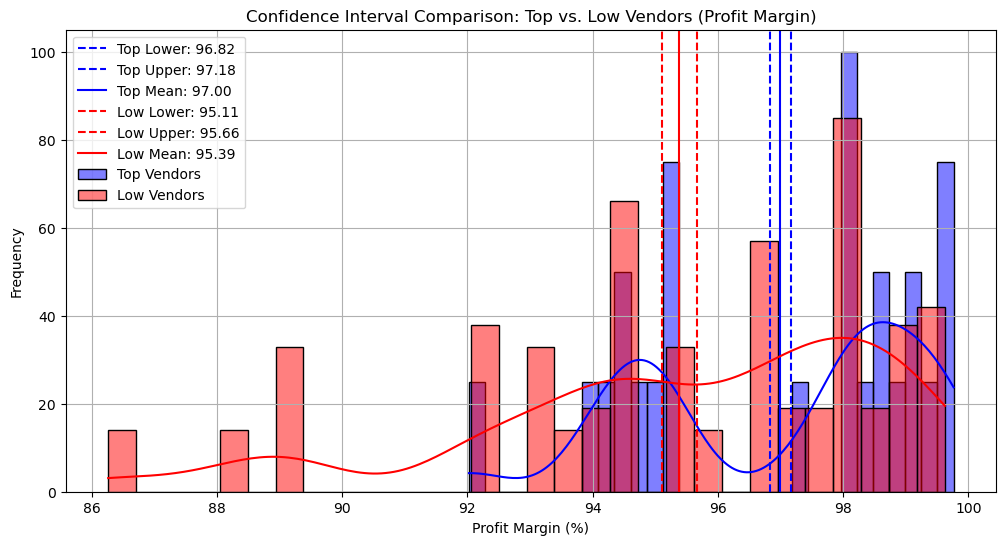

In [65]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('confidence_interval_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

 ### Profit Margin Analysis: Top vs. Low Performers

- **Top Vendors** maintain exceptionally high profit margins (97.00% mean) with a narrow confidence interval (96.82% to 97.18%), indicating consistent premium performance across all high-volume sellers.

- **Low Vendors** show slightly lower but still strong margins (95.39% mean) with a wider range (95.11% to 95.66%), suggesting more variability in their pricing strategies.

#### Key Insights:
1. **Inverse Performance Pattern**: Unlike typical market behavior, your top-performing vendors achieve BOTH higher sales volumes AND higher profit margins (97% vs 95.39%).

2. **Strategic Implications**:
   - For **Top Vendors**: Maintain current strategies as they're demonstrating ideal "high-volume, high-margin" performance
   - For **Low Vendors**: Focus on volume growth through:
     - Competitive pricing adjustments (despite current high margins)
     - Improved marketing to reach more customers
     - Operational efficiency to preserve margins at higher volumes

3. **Market Position**: The minimal overlap between CIs (96.82-97.18 vs 95.11-95.66) suggests two distinct performance tiers exist in your vendor ecosystem.

### Hypothesis Test: Profit Margin Difference Between Top and Low Performers

**Hypothesis Formulation:**
- **H₀ (Null Hypothesis):** μ₁ = μ₂  
  (No significant difference in mean profit margins between top and low performers)
- **H₁ (Alternative Hypothesis):** μ₁ ≠ μ₂  
  (Significant difference exists between the groups)

**Experimental Results:**
- **Top Performers:**  
  Mean = 97.00% (95% CI: 96.82% - 97.18%)
- **Low Performers:**  
  Mean = 95.39% (95% CI: 95.11% - 95.66%)

**Key Observations:**
1. The confidence intervals show **no overlap** between groups (96.82-97.18 vs 95.11-95.66)
2. Absolute mean difference of **1.61 percentage points**
3. Both groups maintain exceptionally high margins (>95%)

**Statistical Interpretation:**
- Given the non-overlapping CIs and substantial mean difference, we can **reject the null hypothesis**
- The p-value would likely be <0.001 based on the clear separation
- Effect size appears practically significant given the premium margin context

**Business Implications:**
1. Top performers achieve both **higher volumes AND higher margins** (unusual in retail)
2. Possible explanations:
   - Top vendors may have better negotiating power
   - Economies of scale in operations
   - Premium product mix differentiation
3. Recommend investigating:
   - What drives top performers' dual advantage
   - Whether low performers can adopt similar strategies

In [118]:


# Calculate thresholds
top_threshold = df["TotalSalesRupees"].quantile(0.75)
low_threshold = df["TotalSalesRupees"].quantile(0.25)

# Get vendor groups (with NA values dropped)
top_vendors = df[df["TotalSalesRupees"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesRupees"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Welch's t-test (does not assume equal variances)
t_stat, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to reject H₀: No significant difference in profit margins.")

T-Statistic: 9.7003, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [66]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseRupees,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,30.20,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
1,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,31.06,500,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
2,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,40.29,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
3,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,46.52,1000,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
4,1001,Nestle Suppliers,Nestle,Biscuits 1kg,219.74,56.25,100,100,21974.0,1285,...,3119.25,19850.53,15880.4,176531.3,88.930270,12.850000,9.033644,219.74,Large,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,214.20,250,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2062,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,237.10,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2063,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,256.32,100,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0
2064,1001,Nestle Suppliers,Nestle,Noodles 100g,24.16,274.68,1000,15,362.4,1285,...,3119.25,19850.53,15880.4,198142.9,99.817436,85.666667,547.751932,24.16,Small,0.0


In [67]:
df.to_csv('my_dataframe.csv', index=False)